# Illovsky Code for WGU D207 - Data Exploration
# Load Libraries and Load dataset

In [2]:
# Enable inline plotting in the notebook. Comes before importing matplotlib
%matplotlib inline
# import libraries
import plotnine as p9 # python ggplot. Create plotting graphics declaratively. Density plots
import pandas as pd # for working with dataframes
from scipy import stats # for stats
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # requires pandas and matplotlib, offers more visualization options
import numpy as np # for arrays. mathematical operations
# Import Data
df = pd.read_csv('c:/LabFiles/D207-medical/medical_clean.csv', index_col=0) # path to csv; change for your environment
pd.set_option("display.max_columns", None) # to display all columns

# B1 - Code For Unpaired Independent Two Sample T-test

In [3]:
# Create dataframes subset for 'ReAdmis' 'Yes' and 'ReAdmis' 'No'.
readmit_yes = df[df['ReAdmis'] == "Yes"]
readmit_no = df[df['ReAdmis'] == "No"]

# dataframe for just the VitD_levels for readmittance
vitd_readmit_yes = readmit_yes['VitD_levels']
vitd_readmit_no = readmit_no['VitD_levels']

# Perform T-test
statistic, p_value = stats.ttest_ind(vitd_readmit_yes, vitd_readmit_no, equal_var=False)
print(f"t-Test: Statistic={statistic}, p-value={p_value}")

t-Test: Statistic=0.40715897438864357, p-value=0.6839026987727818


# C. Code For Univariate Statistics
## Two Continuous Variables; Two Categorical
## Additional Univariate Code for validating data for t-test

Vitamin D , ReAdmis 'Yes': 
count    3669.000000
mean       17.975079
std         2.029811
min         9.806483
25%        16.592490
50%        17.972790
75%        19.351170
max        24.889110
Name: VitD_levels, dtype: float64

Median of Vitamin D , ReAdmis 'Yes' : 
17.97279 ng/mL

Vitamin D, ReAdmis 'No': 
 count    6331.000000
mean       17.957993
std         2.010039
min        10.315234
25%        16.645861
50%        17.937545
75%        19.344470
max        26.394449
Name: VitD_levels, dtype: float64

Median of Vitamin D , ReAdmis 'No': 
17.9375455 ng/mL

Vitamin D for all patients: 
 count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

Median VitD_Levels for all patients: 
17.951122255 ng/mL

Income: 
 count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%  

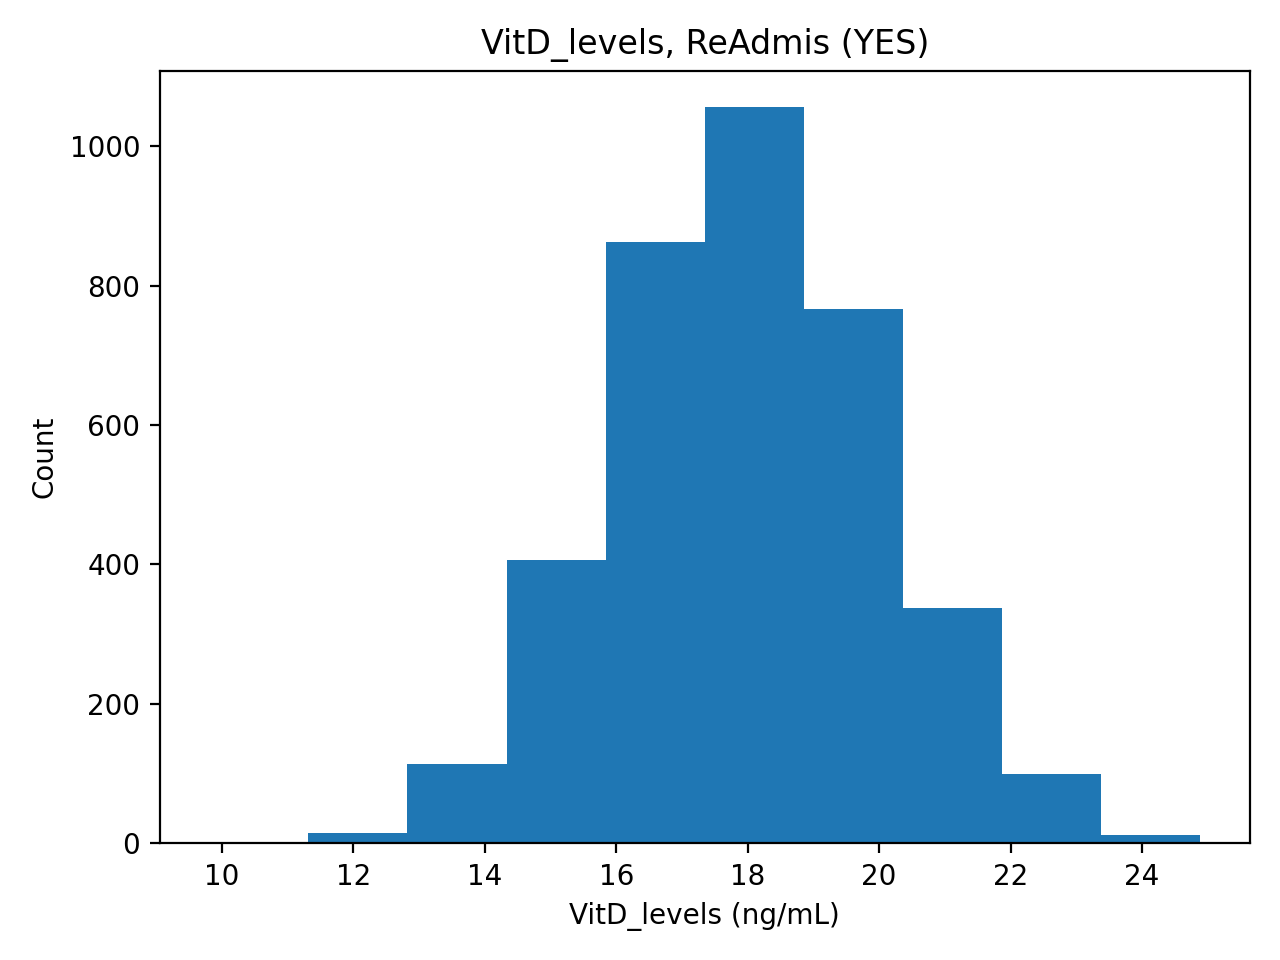

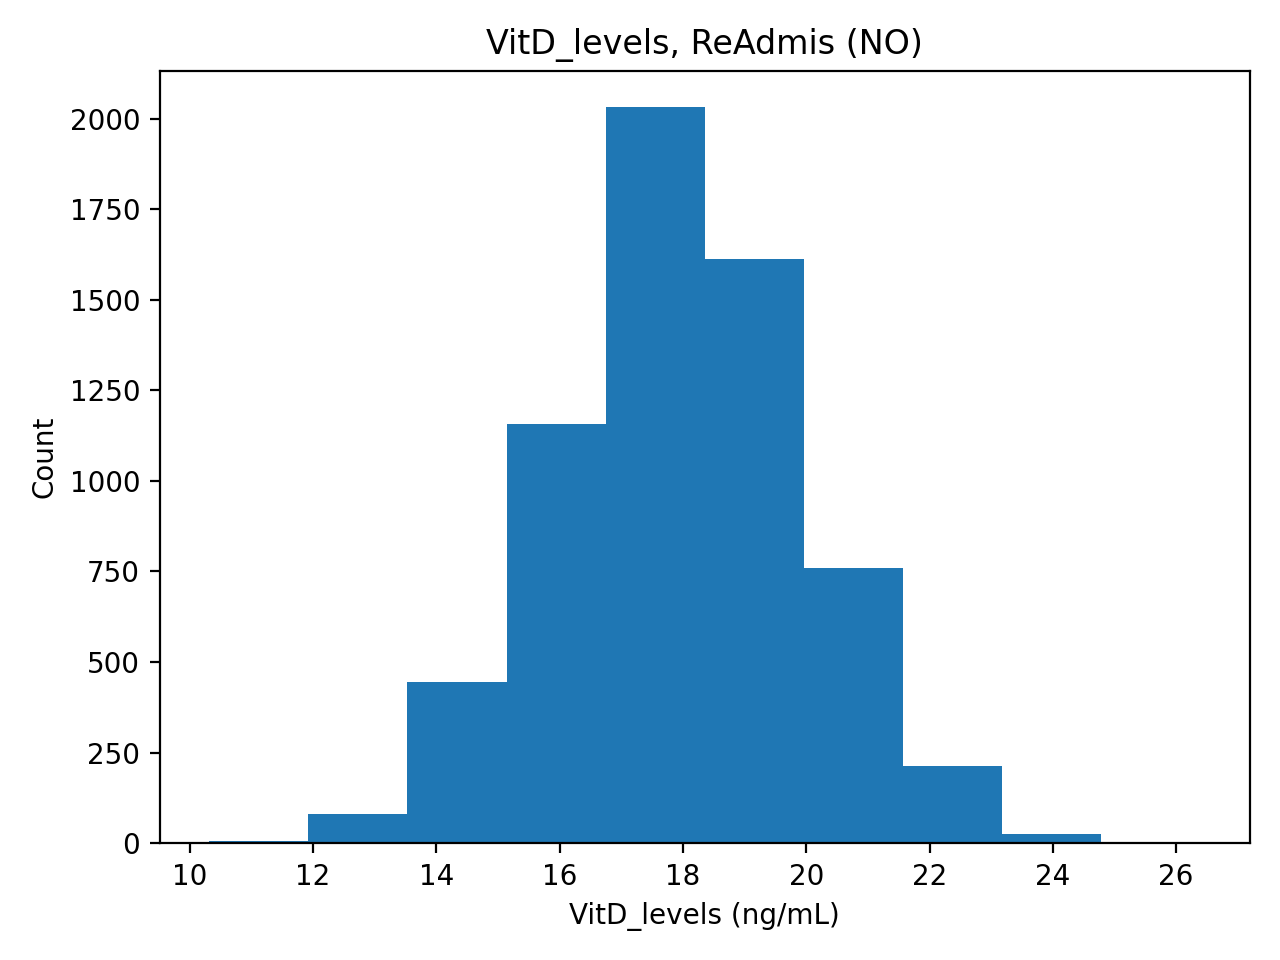

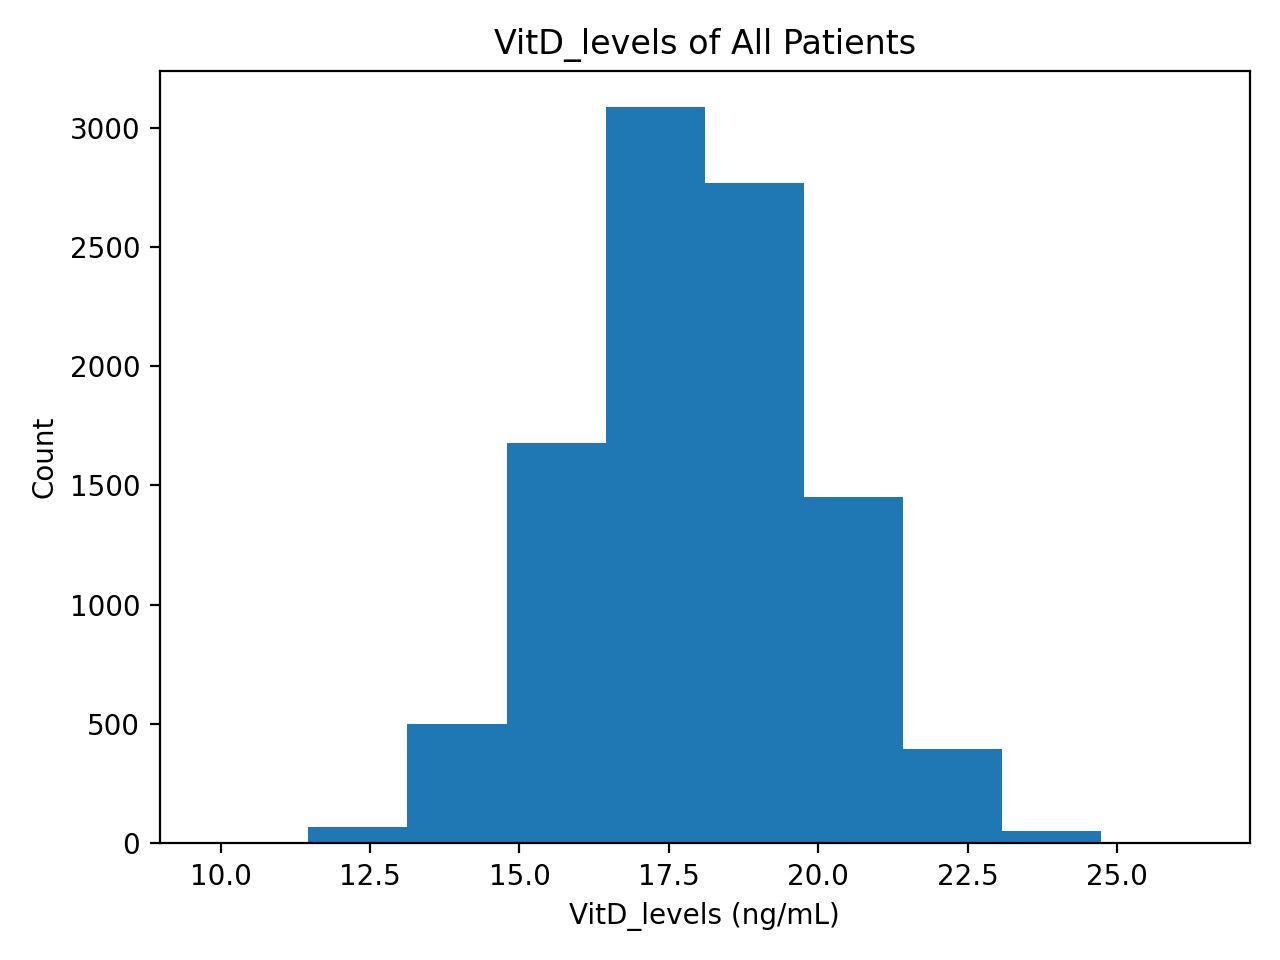

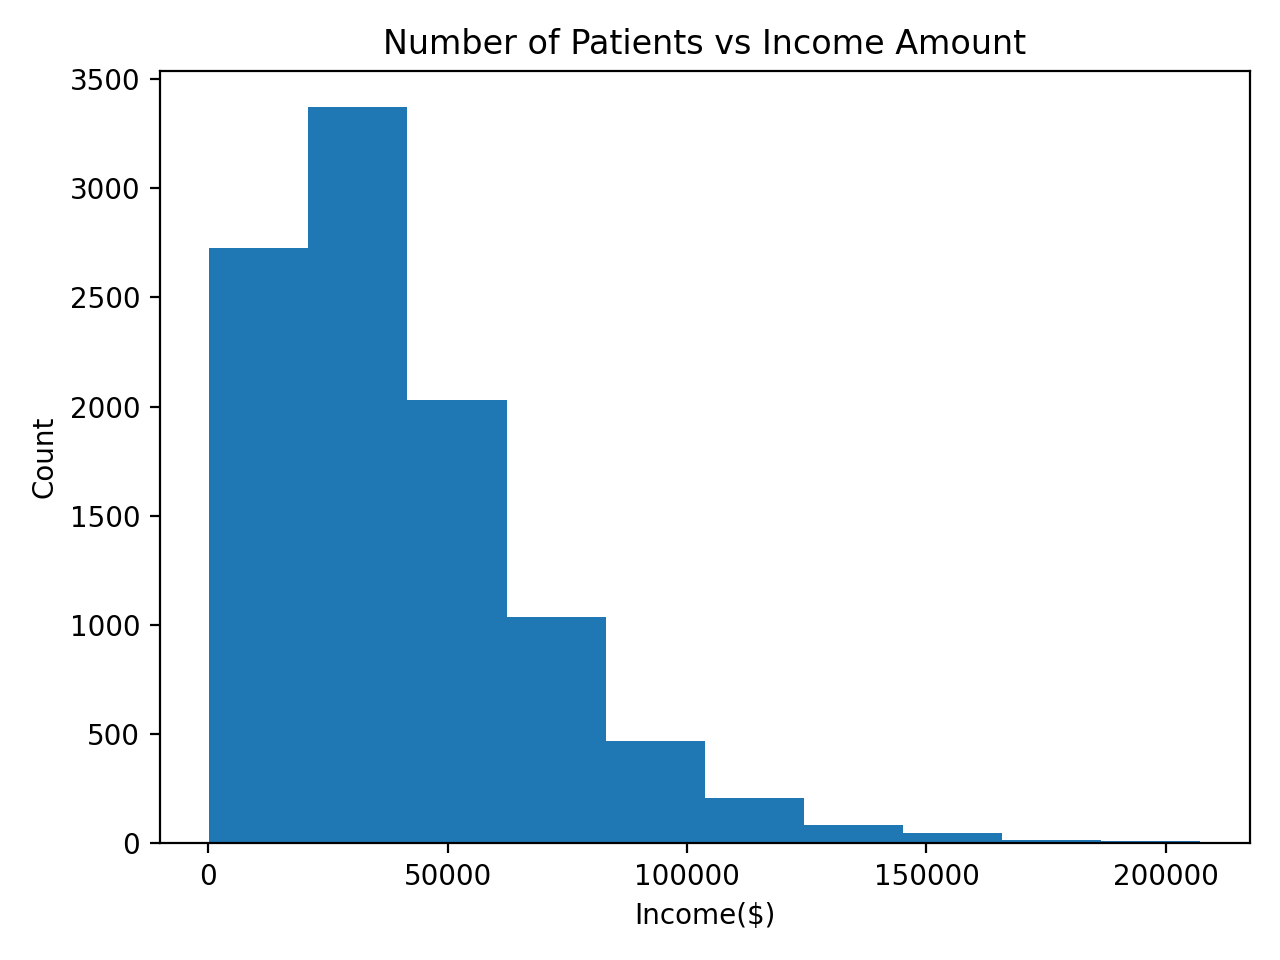

In [9]:
# Describe and Histograms continuous variables 1) VitD_levels; 2) vitd_readmit_yes, 3) vitd_readmit_no, Income
print(f"Vitamin D , ReAdmis 'Yes': \n{vitd_readmit_yes.describe()}\n")
print(f"Median of Vitamin D , ReAdmis 'Yes' : \n{np.median(vitd_readmit_yes)} ng/mL\n")
## Summary stats for VitD_levels of patients not readmitted
print(f"Vitamin D, ReAdmis 'No': \n {vitd_readmit_no.describe()}\n")
print(f"Median of Vitamin D , ReAdmis 'No': \n{np.median(vitd_readmit_no)} ng/mL\n")
# Original VitD_levels mean and summary stats
print(f"Vitamin D for all patients: \n {df['VitD_levels'].describe()}\n")
print(f"Median VitD_Levels for all patients: \n{np.median(df['VitD_levels'])} ng/mL\n")
# Additional Testing Practice Continuous Data Variable
print(f"Income: \n {df['Income'].describe()}\n")
# Practice/Test with Income
print(f"Median Income of all patients: \n${np.median(df['Income'])}\n")
# Levene test for equality of variance
stat, p = stats.levene(vitd_readmit_no, vitd_readmit_yes)
print(f"Testing variances of VitD_levels of patients who have and haven't been readmitted \np==> {p}")
if p > 0.05:
    print("Variances are homogeneous")
else:
    print("Variances are not homogeneous")
# spacer
print('\n \n')
# Histogram (check for normality, homogeniety of variance)
plt.hist(vitd_readmit_yes)
plt.title('VitD_levels, ReAdmis (YES)')
plt.xlabel('VitD_levels (ng/mL)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.hist(vitd_readmit_no)
plt.title('VitD_levels, ReAdmis (NO)')
plt.xlabel('VitD_levels (ng/mL)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.hist(df['VitD_levels'])
plt.title('VitD_levels of All Patients')
plt.xlabel('VitD_levels (ng/mL)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.hist(df['Income'])
plt.title('Number of Patients vs Income Amount')
plt.xlabel('Income($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Summary Stats for ReAdmins 
count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

Summary Stats for Anxiety 
count     10000
unique        2
top          No
freq       6785
Name: Anxiety, dtype: object


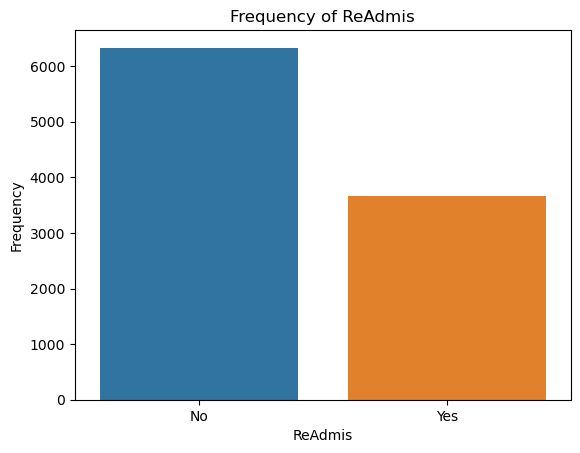

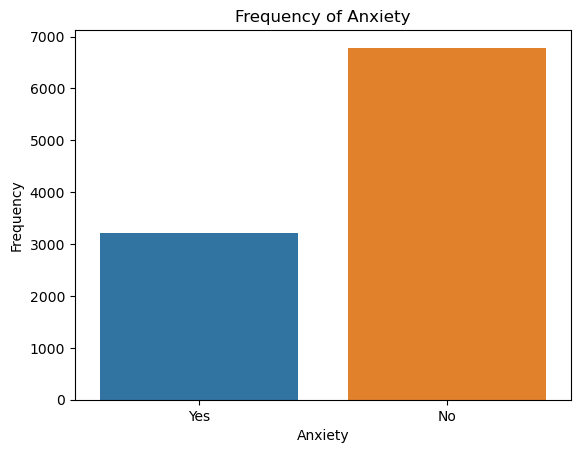

In [40]:
# Describe Bar Chart for Categorical Data 'ReAdmis' and 'Anxiety'
print(f"Summary Stats for ReAdmins \n{df['ReAdmis'].describe()}\n")
print(f"Summary Stats for Anxiety \n{df['Anxiety'].describe()}")
# Bar charts for categorical data: ReAdmis; Anxiety | Univariate categorical distribution
# ReAdmis
sns.countplot(x='ReAdmis', data=df)
plt.xlabel('ReAdmis')
plt.ylabel('Frequency')
plt.title('Frequency of ReAdmis')
plt.show()
# Anxiety
sns.countplot(x='Anxiety', data=df)
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.title('Frequency of Anxiety')
plt.show()

# D. Code For Bivariate Statistics

In [56]:
# Contingency Table of two categorical variables: Anxiety ReAdmis
# Contingency Table Larose, p52. 4.3.1
contingency_table = pd.crosstab(df['ReAdmis'], df['Anxiety'])
print(contingency_table)
# Expresses as Column percentage
print('\nExpressed as column percentage')
print(round(contingency_table.div(contingency_table.sum(0), axis =1)*100, 1))

Anxiety    No   Yes
ReAdmis            
No       4301  2030
Yes      2484  1185

Expressed as column percentage
Anxiety    No   Yes
ReAdmis            
No       63.4  63.1
Yes      36.6  36.9


In [4]:
# Bivariate statistics pearson correlation coefficient
# 2 continuous variables
# from scipy.stats.stats import pearsonr
#calculation correlation coefficient and p-value between x and y
print(stats.pearsonr(df['Income'], df['VitD_levels']))
# statistic is around 0, no real correlation ( -1 to 1). pvalue=0.189 . fairly high. no statistical significance association between the two variables.

PearsonRResult(statistic=-0.013115002087708999, pvalue=0.18972513870942453)


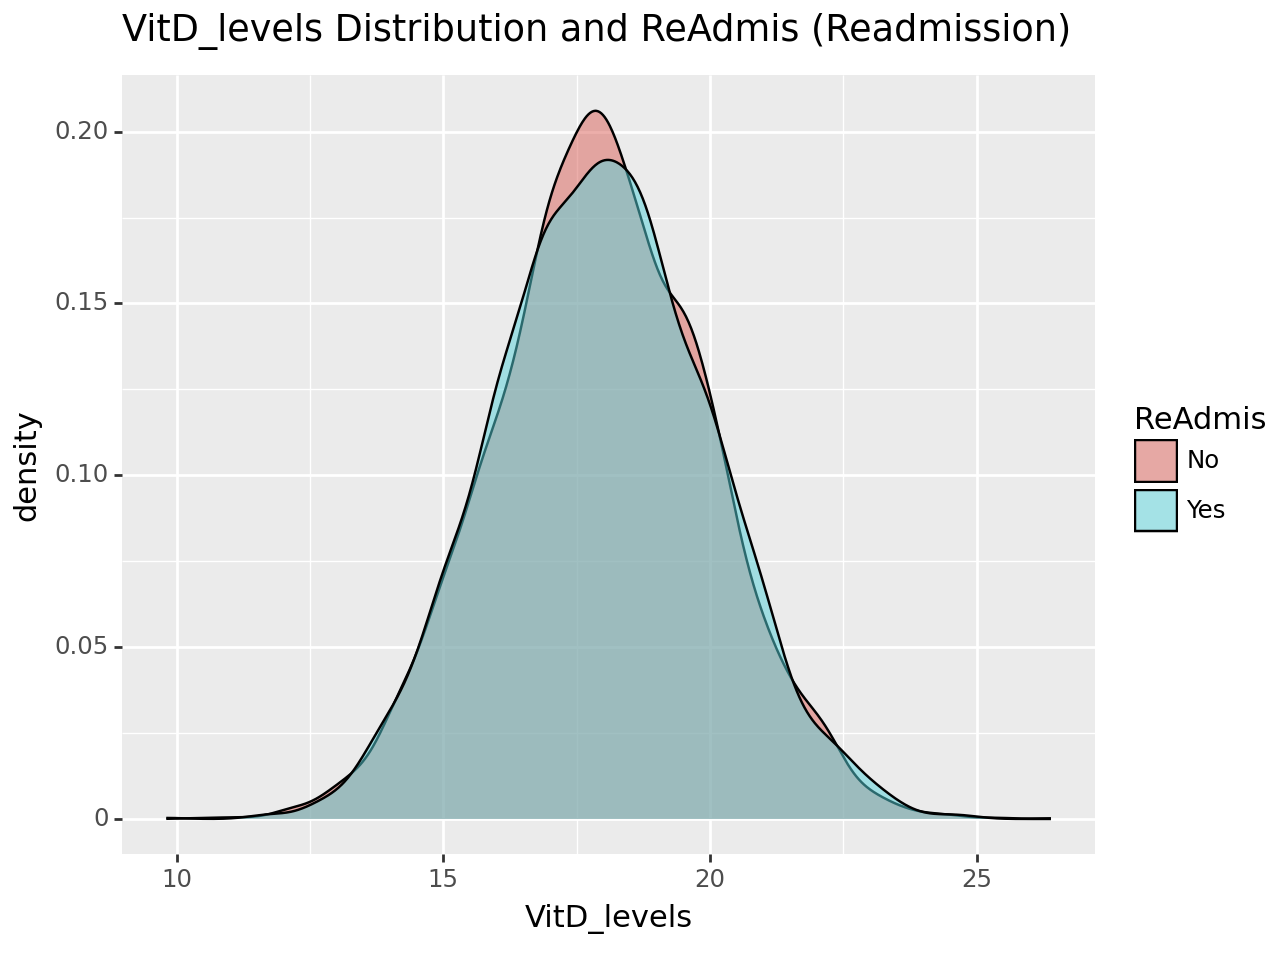

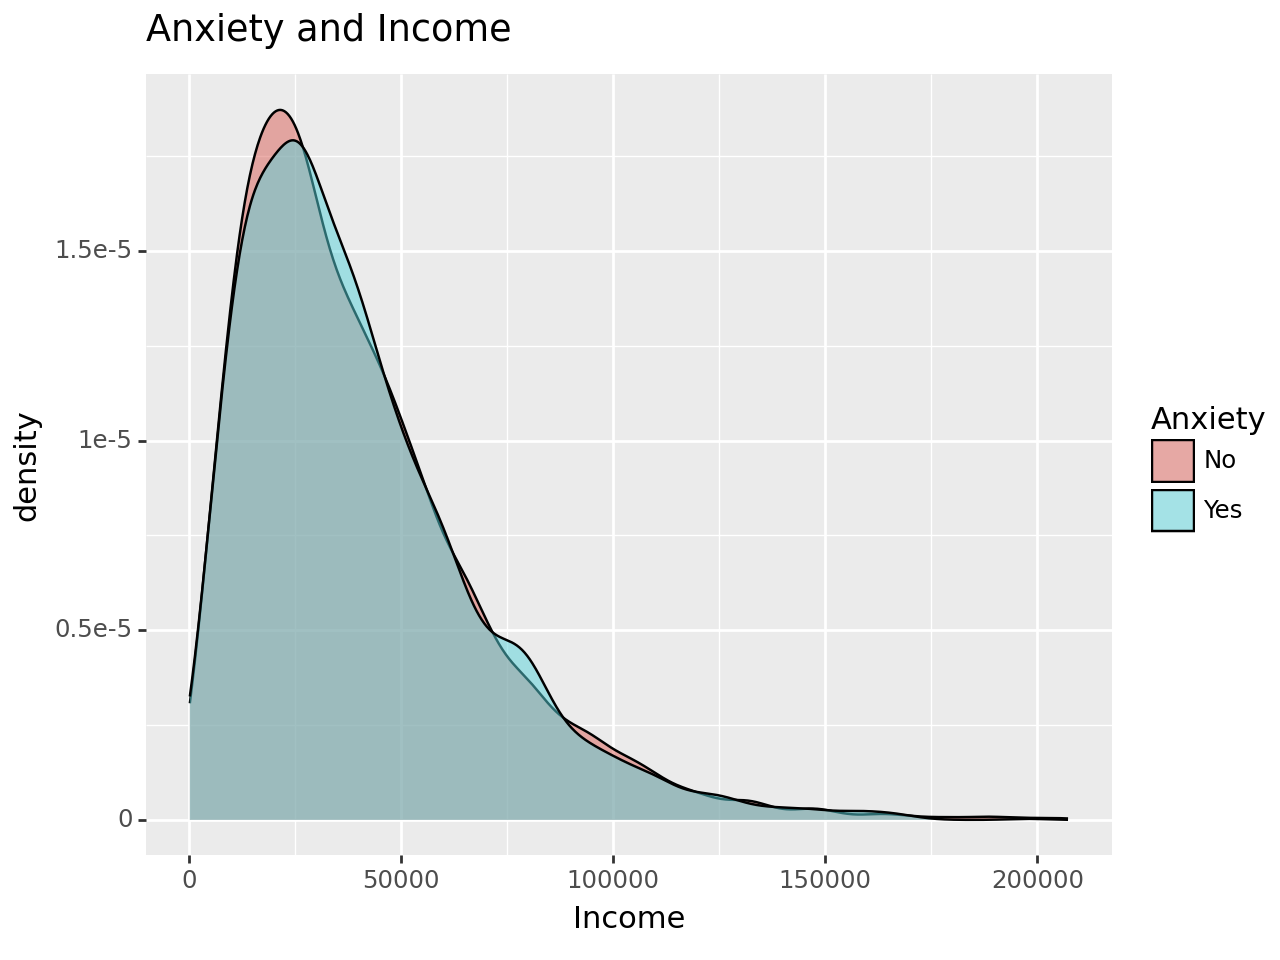

In [43]:
# Density plot | Bivariate
print (p9.ggplot(df)+ 
    p9.aes(x='VitD_levels', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "VitD_levels Distribution and ReAdmis (Readmission)")
    )
print (p9.ggplot(df)+ 
    p9.aes(x='Income', fill='Anxiety')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Anxiety and Income")
    )

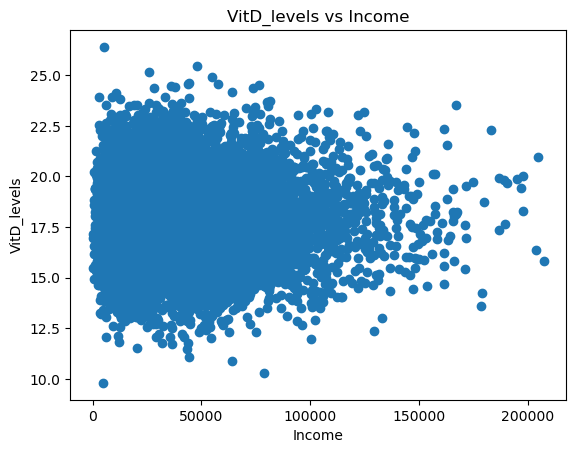

In [5]:
# Bivariate Scatterplots for numeric data
# scatterplot Income vs VitD_levels
plt.scatter(x='Income', y='VitD_levels', data=df)
plt.title('VitD_levels vs Income')
plt.xlabel('Income')
plt.ylabel('VitD_levels')
plt.show()